## IS453 Financial Analytics
## Week 12 - Credit Scoring Lab

### Credit scorecard performance evaluation and tuning

**Install scorecardpy**
This is a python version of R package scorecard. The API link has more info :

https://pypi.org/project/scorecardpy/

https://github.com/shichenxie/scorecardpy/

https://cran.r-project.org/web/packages/scorecard/scorecard.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import scorecardpy as sc
import pprint

In [2]:
pd.options.display.max_columns = None


In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Filter Data

In [4]:
# sample code
group_data = pd.read_csv('IS453 Group Assignment - Data.csv')

df_filtered = group_data[group_data['OCCUPATION_TYPE'] == 'Drivers']

In [5]:
df_filtered #18603 rows x 75 columns 

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
13,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0,0.0,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
16,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,-6392.0,-3866,NaN,1,1,0,1,0,0,Drivers,2.0,2,2,THURSDAY,12,0,0,0,1,1,0,Government,NaN,0.236378,0.062103,NaN,0.0,0.0,0.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
24,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286,-746,-108.0,-3729,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,THURSDAY,14,0,0,0,0,1,1,Business Entity Type 3,NaN,0.786179,0.565608,0.1433,1.0,1.0,1.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
33,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,3.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,NaN,0.321745,0.411849,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
37,0,Cash loans,M,N,Y,0,121500.0,454500.0,15151.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-21077,-1288,-5474.0,-4270,NaN,1,1,0,1,1,0,Drivers,2.0,2,2,FRIDAY,10,0,0,0,0,1,1,Transport: type 4,0.804586,0.719799,0.722393,NaN,0.0,0.0,0.0,0.0,-1541.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307425,0,Revolving loans,M,Y,Y,2,234000.0,450000.0,22500.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.022800,-11943,-3214,-5994.0,-3520,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,FRIDAY,13,0,1,1,0,1,1,Industry: type 9,0.216368,0.414246,0.384207,NaN,0.0,0.0,0.0,0.0,-1911.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307432,0,Cash loans,M,N,Y,0,135000.0,840951.0,42934.5,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House /

In [6]:
df_filtered_forsc = df_filtered.copy()

In [7]:
# df_filtered_forsc
# after dropping code gender, days1711 rows x 75 columns

# drop irrelevant/ bias variables
# CODE_GENDER

biased_col = ['CODE_GENDER']
df_filtered_forsc = df_filtered_forsc.drop(columns = biased_col)

In [8]:
df_filtered_forsc
# 1711 rows × 73 columns

,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
13,0,Cash loans,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0,0.0,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
16,0,Cash loans,N,N,0,108000.0,509602.5,26149.5,387000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,-6392.0,-3866,NaN,1,1,0,1,0,0,Drivers,2.0,2,2,THURSDAY,12,0,0,0,1,1,0,Government,NaN,0.236378,0.062103,NaN,0.0,0.0,0.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
24,0,Cash loans,Y,N,2,135000.0,247500.0,12703.5,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286,-746,-108.0,-3729,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,THURSDAY,14,0,0,0,0,1,1,Business Entity Type 3,NaN,0.786179,0.565608,0.1433,1.0,1.0,1.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
33,0,Cash loans,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,3.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,NaN,0.321745,0.411849,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
37,0,Cash loans,N,Y,0,121500.0,454500.0,15151.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-21077,-1288,-5474.0,-4270,NaN,1,1,0,1,1,0,Drivers,2.0,2,2,FRIDAY,10,0,0,0,0,1,1,Transport: type 4,0.804586,0.719799,0.722393,NaN,0.0,0.0,0.0,0.0,-1541.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307425,0,Revolving loans,Y,Y,2,234000.0,450000.0,22500.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.022800,-11943,-3214,-5994.0,-3520,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,FRIDAY,13,0,1,1,0,1,1,Industry: type 9,0.216368,0.414246,0.384207,NaN,0.0,0.0,0.0,0.0,-1911.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307432,0,Cash loans,N,Y,0,135000.0,840951.0,42934.5,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009175,-18146,-37

# pc_missing analysis

In [9]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [10]:
columns_infoDF = show_missing(df_filtered_forsc)

In [11]:
columns_infoDF

,variable,dtype,count,unique,missing,pc_missing
0,STATUS,int64,18603,2,0,0.00
1,NAME_CONTRACT_TYPE,object,18603,2,0,0.00
2,FLAG_OWN_CAR,object,18603,2,0,0.00
3,FLAG_OWN_REALTY,object,18603,2,0,0.00
4,CNT_CHILDREN,int64,18603,8,0,0.00
5,AMT_INCOME_TOTAL,float64,18603,253,0,0.00
6,AMT_CREDIT,float64,18603,2371,0,0.00
7,AMT_ANNUITY,float64,18603,5642,1,0.01
8,AMT_GOODS_PRICE,float64,18603,396,13,0.07
9,NAME_TYPE_SUITE,object,18603,8,82,0.44


### Columns that only have 1 unique value

In [12]:
unique_var_df = columns_infoDF[columns_infoDF['unique'] == 1]
unique_var_df.value_counts()

variable          dtype   count  unique  missing  pc_missing
FLAG_DOCUMENT_10  int64   18603  1       0        0.0           1
FLAG_DOCUMENT_12  int64   18603  1       0        0.0           1
FLAG_DOCUMENT_2   int64   18603  1       0        0.0           1
FLAG_DOCUMENT_4   int64   18603  1       0        0.0           1
FLAG_MOBIL        int64   18603  1       0        0.0           1
OCCUPATION_TYPE   object  18603  1       0        0.0           1
dtype: int64

In [13]:
unique_var_list = list(unique_var_df['variable'])

In [14]:
# unique_var_list

### Drop columns with one unique value

In [15]:
# sample code

df_filtered_forsc.drop(columns = unique_var_list, inplace=True)
len(df_filtered_forsc.columns)

68

### Categorical Variables

In [16]:
# df_filtered_forsc.dtypes

In [17]:
g = df_filtered_forsc.columns.to_series().groupby(df_filtered_forsc.dtypes).groups

In [18]:
g

{int64: ['STATUS', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], float64: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_3

In [19]:
# object: ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

In [20]:
# categorical variables's  list
cat_var_list = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
print(str(len(cat_var_list)) + " Categorical Variables are " + str(cat_var_list))

10 Categorical Variables are ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


### Continous Variables

In [21]:
#  float64: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [22]:
# continous variables's  list
cont_var_list =  ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
print(str(len(cont_var_list)) + " Continous Variables are " + str(cont_var_list))

23 Continous Variables are ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


### End of Data Exploration

# Creating Scorecard

**Scorecardpy requires an older version of pandas to be able to accomodate missing values**

So remove missing values for now to be able to test out scorecardpy

### Drop NA

In [23]:
# sample code
df_filtered_forsc.dropna(inplace=True)
df_filtered_forsc.isna().sum()

STATUS                         0
NAME_CONTRACT_TYPE             0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [24]:
# df_filtered_forsc #1711 rows × 68 columns

### Column's info after dropping NA (finding unique value =1)

In [25]:
columns_infoDF2 = show_missing(df_filtered_forsc)

In [26]:
one_unique_col_df = columns_infoDF2[columns_infoDF2['unique'] <= 1]

In [27]:
one_unique_col_list = list(one_unique_col_df['variable'])

In [28]:
one_unique_col_list

['FLAG_OWN_CAR',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20']

In [29]:
len(one_unique_col_list)

6

### Drop Variables with Unique Value = 1 after dropping NA values

In [30]:
# df_filtered_forsc
# # 1711 rows × 68 columns

In [31]:
# 62 columns left
df_filtered_forsc.drop(columns= one_unique_col_list, inplace=True, axis=1)

In [32]:
# # 62 columns left
# df_filtered_forsc

### Categorical Variables

In [33]:
# columninfoDF3 = show_missing(df_filtered_forsc)

In [34]:
g2 = df_filtered_forsc.columns.to_series().groupby(df_filtered_forsc.dtypes).groups

In [35]:
g2

{int64: ['STATUS', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_21'], float64: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHAN

In [36]:
# cat_var = g2.get("int64")
# len(cat_var)

In [37]:
# object: ['NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']}

In [38]:
# categorical variables's  list
cat_var_list2 = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
print(str(len(cat_var_list)) + " Categorical Variables are " + str(cat_var_list))

10 Categorical Variables are ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


### Continous Variables

In [39]:
# float64: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [40]:
# continous variables's  list
cont_var_list2 = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
print(str(len(cont_var_list2)) + " Continuous Variables are " + str(cont_var_list2))

23 Continuous Variables are ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


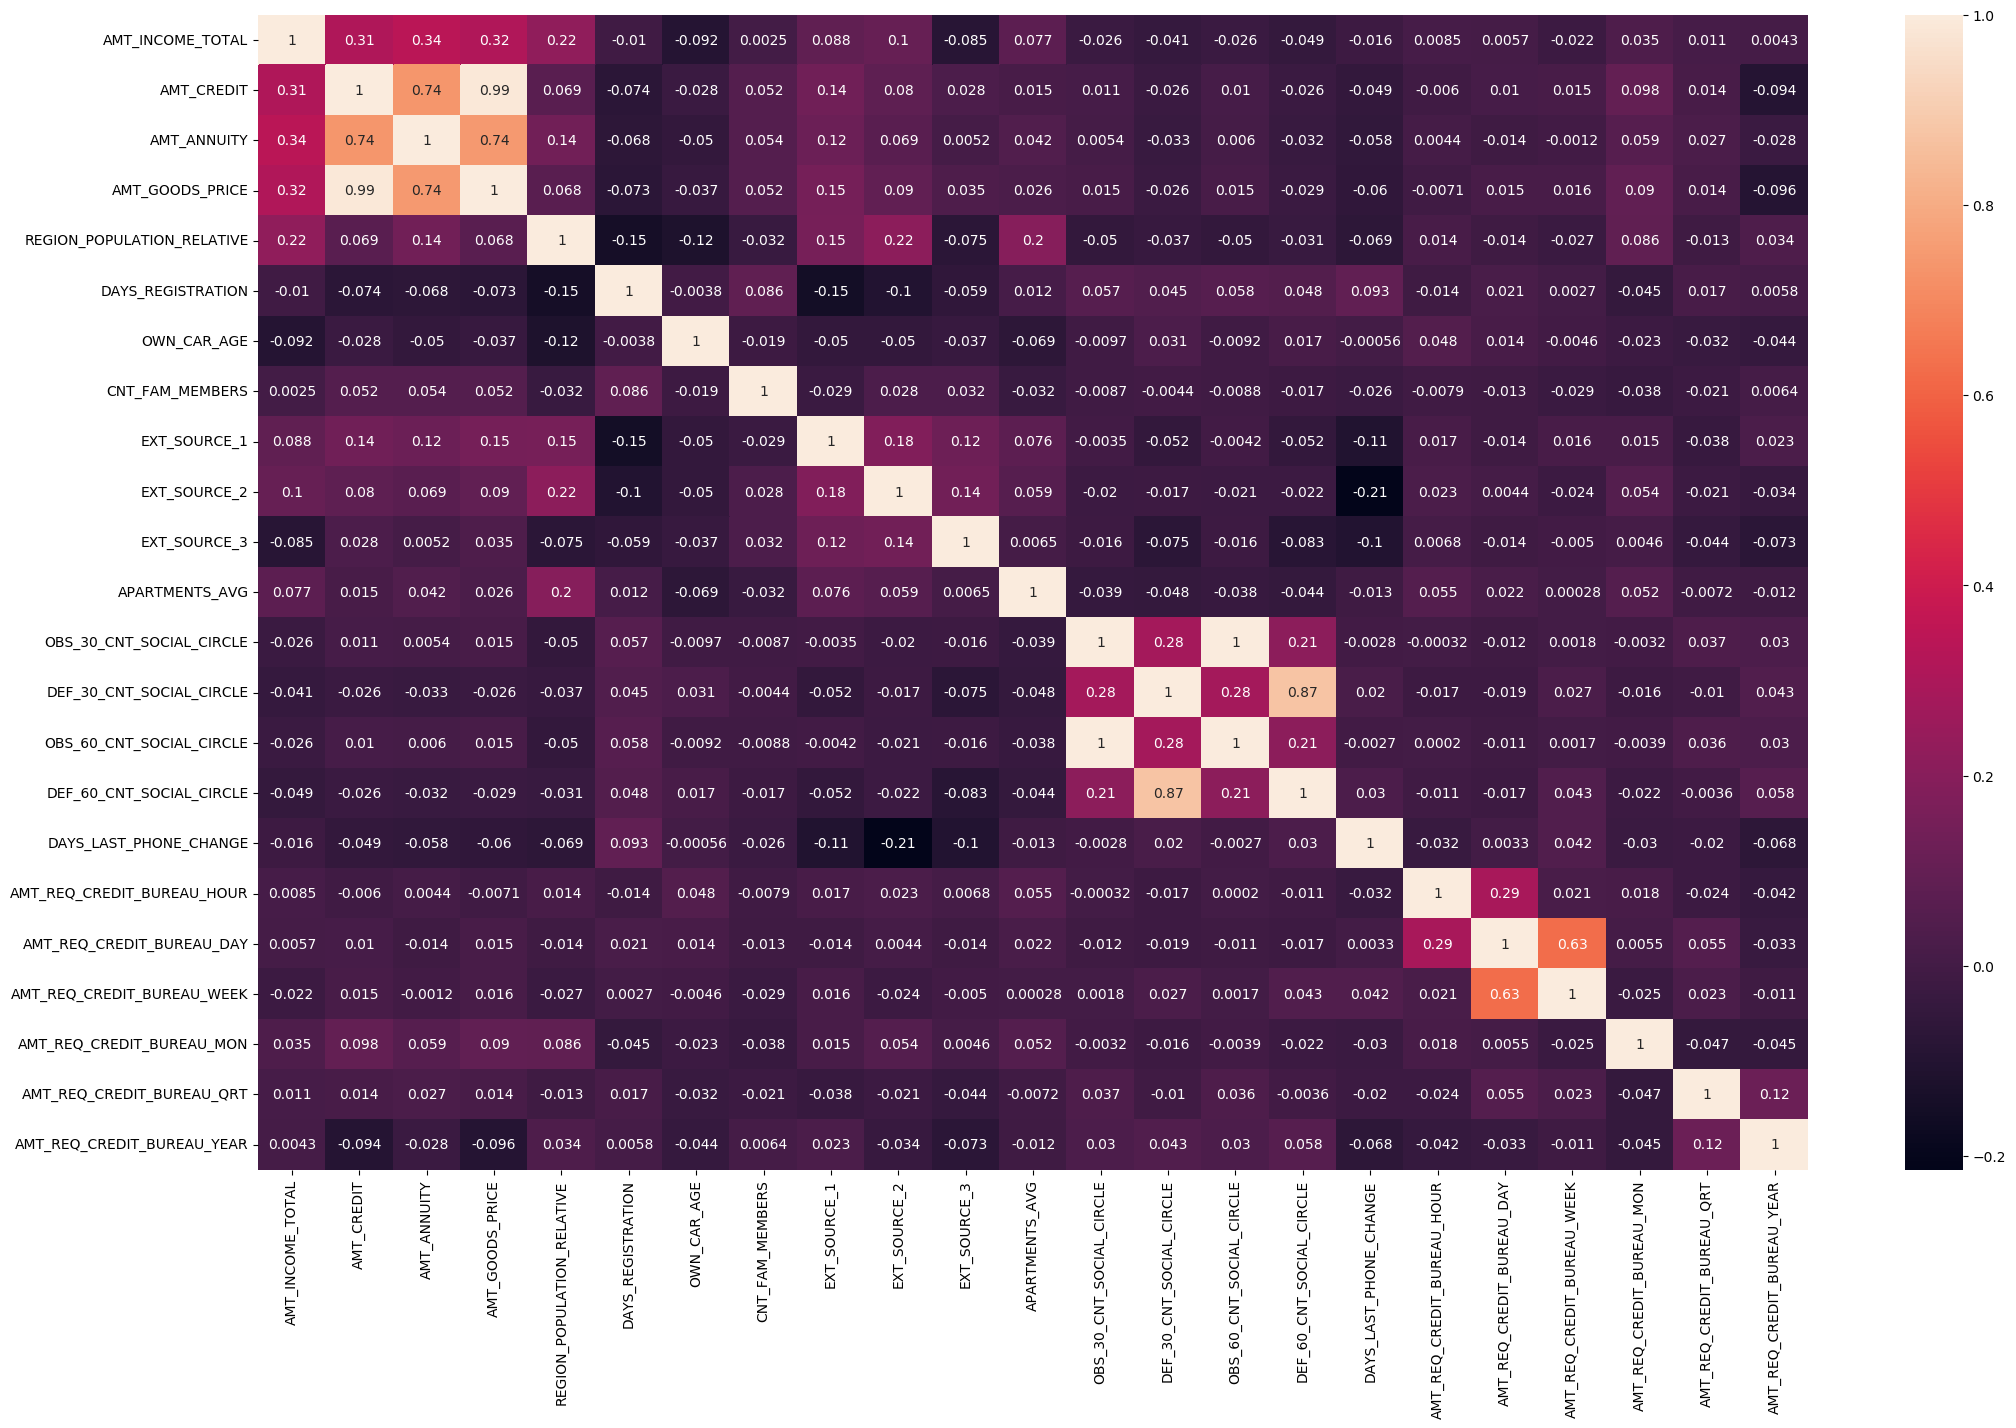

In [41]:
# 23 continous variables
continuous_df = df_filtered_forsc[cont_var_list2]
corr_df = continuous_df.corr()

plt.subplots(figsize=(25,15))
sns.heatmap(corr_df, annot=True)
# 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

In [42]:
# corr_df
highly_corr_cont_col_list = ['AMT_GOODS_PRICE','DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK' ]

In [43]:
drop_col_list = highly_corr_cont_col_list
len(drop_col_list)

3

In [44]:
# df_filtered_forsc #1711 rows × 62 columns

In [45]:
# sample code
df_filtered_forsc.drop(columns= drop_col_list, inplace= True)

In [46]:
# df_filtered_forsc #1711 rows × 59 columns

In [47]:
df_filtered_forsc['STATUS'].value_counts()

0    1582
1     129
Name: STATUS, dtype: int64

In [48]:
df_filtered_forsc.info() # 59 columns, 59 variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1711 entries, 218 to 307040
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STATUS                       1711 non-null   int64  
 1   NAME_CONTRACT_TYPE           1711 non-null   object 
 2   FLAG_OWN_REALTY              1711 non-null   object 
 3   CNT_CHILDREN                 1711 non-null   int64  
 4   AMT_INCOME_TOTAL             1711 non-null   float64
 5   AMT_CREDIT                   1711 non-null   float64
 6   AMT_ANNUITY                  1711 non-null   float64
 7   NAME_TYPE_SUITE              1711 non-null   object 
 8   NAME_INCOME_TYPE             1711 non-null   object 
 9   NAME_EDUCATION_TYPE          1711 non-null   object 
 10  NAME_FAMILY_STATUS           1711 non-null   object 
 11  NAME_HOUSING_TYPE            1711 non-null   object 
 12  REGION_POPULATION_RELATIVE   1711 non-null   float64
 13  DAYS_BIRTH    

**Generate WOE bins**

Woebin() generate groupings as a python dictionary object and also provides a method to plot WOE for the bins.  It will optimize for IV, but will not attempt to make the trend monotonic.

In [49]:
# bins.items()
# [k for k, v in bins.items() if v > 0]

In [50]:
# automatically calculate bin ranges 
bins = sc.woebin(df_filtered_forsc, 'STATUS')

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)
    
# look at less that -0.1 as bad predictive

[INFO] creating woe binning ...
Binning on 1711 rows and 59 columns in 00:00:11
FLAG_DOCUMENT_15  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_15,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_CITY_NOT_LIVE_CITY,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
LIVE_CITY_NOT_WORK_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVE_CITY_NOT_WORK_CITY,"[-inf,1.0)",1437,0.83986,1327,110,0.076548,0.016437,0.000229,0.001482,1.0,False
1,LIVE_CITY_NOT_WORK_CITY,"[1.0,inf)",274,0.16014,255,19,0.069343,-0.090192,0.001254,0.001482,inf,False


----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,WEEKDAY_APPR_PROCESS_START,"SATURDAY%,%SUNDAY",286,0.167154,275,11,0.038462,-0.712243,0.063076,0.090882,"SATURDAY%,%SUNDAY",False
1,WEEKDAY_APPR_PROCESS_START,"THURSDAY%,%TUESDAY%,%WEDNESDAY",862,0.503799,798,64,0.074246,-0.016593,0.000138,0.090882,"THURSDAY%,%TUESDAY%,%WEDNESDAY",False
2,WEEKDAY_APPR_PROCESS_START,MONDAY,301,0.175921,274,27,0.089701,0.189342,0.006836,0.090882,MONDAY,False
3,WEEKDAY_APPR_PROCESS_START,FRIDAY,262,0.153127,235,27,0.103053,0.342884,0.020832,0.090882,FRIDAY,False


----------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_30_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",1530,0.894214,1425,105,0.068627,-0.101334,0.008796,0.063348,1.0,False
1,DEF_30_CNT_SOCIAL_CIRCLE,"[1.0,inf)",181,0.105786,157,24,0.132597,0.628441,0.054552,0.063348,inf,False


----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_FAMILY_STATUS,Married,1257,0.734658,1175,82,0.065235,-0.155671,0.016668,0.054815,Married,False
1,NAME_FAMILY_STATUS,Single / not married,204,0.119229,184,20,0.098039,0.287429,0.011132,0.054815,Single / not married,False
2,NAME_FAMILY_STATUS,"Civil marriage%,%Widow%,%Separated",250,0.146113,223,27,0.108000,0.395298,0.027015,0.054815,"Civil marriage%,%Widow%,%Separated",False


----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_CONTRACT_TYPE,Revolving loans,128,0.07481,125,3,0.023438,-1.223069,0.068196,0.071473,Revolving loans,False
1,NAME_CONTRACT_TYPE,Cash loans,1583,0.92519,1457,126,0.079596,0.058780,0.003277,0.071473,Cash loans,False


----------------------------------------------------------------------------------------------------
OWN_CAR_AGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OWN_CAR_AGE,"[-inf,2.0)",99,0.057861,93,6,0.060606,-0.234207,0.002875,0.191977,2.0,False
1,OWN_CAR_AGE,"[2.0,3.0)",113,0.066043,110,3,0.026549,-1.095235,0.050684,0.191977,3.0,False
2,OWN_CAR_AGE,"[3.0,9.0)",574,0.335476,533,41,0.071429,-0.058317,0.001113,0.191977,9.0,False
3,OWN_CAR_AGE,"[9.0,12.0)",244,0.142607,232,12,0.049180,-0.455198,0.024411,0.191977,12.0,False
4,OWN_CAR_AGE,"[12.0,15.0)",232,0.135593,204,28,0.120690,0.520717,0.045877,0.191977,15.0,False
5,OWN_CAR_AGE,"[15.0,18.0)",179,0.104617,171,8,0.044693,-0.555589,0.025599,0.191977,18.0,False
6,OWN_CAR_AGE,"[18.0,inf)",270,0.157802,239,31,0.114815,0.464156,0.041419,0.191977,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_21  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_21,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_6  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_6,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT_W_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_RATING_CLIENT_W_CITY,"[-inf,2.0)",342,0.199883,320,22,0.064327,-0.170646,0.005415,0.044613,2.0,False
1,REGION_RATING_CLIENT_W_CITY,"[2.0,3.0)",1188,0.694331,1103,85,0.071549,-0.056505,0.002164,0.044613,3.0,False
2,REGION_RATING_CLIENT_W_CITY,"[3.0,inf)",181,0.105786,159,22,0.121547,0.528771,0.037034,0.044613,inf,False


----------------------------------------------------------------------------------------------------
FLAG_EMAIL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_EMAIL,"[-inf,1.0)",1546,0.903565,1432,114,0.073739,-0.023996,0.000515,0.004894,1.0,False
1,FLAG_EMAIL,"[1.0,inf)",165,0.096435,150,15,0.090909,0.204048,0.004379,0.004894,inf,False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,150000.0)",420,0.245470,387,33,0.078571,0.044716,0.000500,0.061717,150000.0,False
1,AMT_INCOME_TOTAL,"[150000.0,180000.0)",214,0.125073,193,21,0.098131,0.288465,0.011767,0.061717,180000.0,False
2,AMT_INCOME_TOTAL,"[180000.0,190000.0)",213,0.124489,202,11,0.051643,-0.403740,0.017125,0.061717,190000.0,False
3,AMT_INCOME_TOTAL,"[190000.0,270000.0)",482,0.281707,439,43,0.089212,0.183333,0.010237,0.061717,270000.0,False
4,AMT_INCOME_TOTAL,"[270000.0,inf)",382,0.223261,361,21,0.054974,-0.337723,0.022088,0.061717,inf,False


----------------------------------------------------------------------------------------------------
DAYS_BIRTH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_BIRTH,"[-inf,-20000.0)",99,0.057861,91,8,0.080808,0.075215,0.000338,0.170573,-20000.0,False
1,DAYS_BIRTH,"[-20000.0,-14500.0)",708,0.413793,671,37,0.052260,-0.391218,0.053724,0.170573,-14500.0,False
2,DAYS_BIRTH,"[-14500.0,-13000.0)",321,0.187610,288,33,0.102804,0.340180,0.025094,0.170573,-13000.0,False
3,DAYS_BIRTH,"[-13000.0,-12500.0)",89,0.052016,87,2,0.022472,-1.266128,0.049999,0.170573,-12500.0,False
4,DAYS_BIRTH,"[-12500.0,-12000.0)",91,0.053185,85,6,0.065934,-0.144259,0.001041,0.170573,-12000.0,False
5,DAYS_BIRTH,"[-12000.0,inf)",403,0.235535,360,43,0.106700,0.381729,0.040377,0.170573,inf,False


----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_CHILDREN,"[-inf,1.0)",998,0.583285,917,81,0.081162,0.079974,0.003860,0.021953,1.0,False
1,CNT_CHILDREN,"[1.0,2.0)",466,0.272355,431,35,0.075107,-0.004127,0.000005,0.021953,2.0,False
2,CNT_CHILDREN,"[2.0,inf)",247,0.144360,234,13,0.052632,-0.383739,0.018089,0.021953,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_3  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_3,"[-inf,1.0)",696,0.40678,653,43,0.061782,-0.213744,0.016979,0.027057,1.0,False
1,FLAG_DOCUMENT_3,"[1.0,inf)",1015,0.59322,929,86,0.084729,0.126871,0.010078,0.027057,inf,False


----------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_FAM_MEMBERS,"[-inf,2.0)",247,0.144360,222,25,0.101215,0.322831,0.017262,0.040007,2.0,False
1,CNT_FAM_MEMBERS,"[2.0,3.0)",807,0.471654,745,62,0.076828,0.020383,0.000198,0.040007,3.0,False
2,CNT_FAM_MEMBERS,"[3.0,4.0)",418,0.244302,388,30,0.071770,-0.053175,0.000675,0.040007,4.0,False
3,CNT_FAM_MEMBERS,"[4.0,inf)",239,0.139684,227,12,0.050209,-0.433411,0.021872,0.040007,inf,False


----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OBS_30_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",884,0.516657,825,59,0.066742,-0.131213,0.008414,0.061044,1.0,False
1,OBS_30_CNT_SOCIAL_CIRCLE,"[1.0,2.0)",308,0.180012,277,31,0.100649,0.316602,0.020647,0.061044,2.0,False
2,OBS_30_CNT_SOCIAL_CIRCLE,"[2.0,4.0)",270,0.157802,247,23,0.085185,0.132739,0.002942,0.061044,4.0,False
3,OBS_30_CNT_SOCIAL_CIRCLE,"[4.0,6.0)",143,0.083577,137,6,0.041958,-0.621589,0.024918,0.061044,6.0,False
4,OBS_30_CNT_SOCIAL_CIRCLE,"[6.0,inf)",106,0.061952,96,10,0.094340,0.244870,0.004123,0.061044,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_HOUR,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_DAY,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_1  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_1,"[-inf,0.2)",233,0.136178,198,35,0.150215,0.773714,0.113086,0.279114,0.2,False
1,EXT_SOURCE_1,"[0.2,0.4)",621,0.362946,567,54,0.086957,0.155257,0.009346,0.279114,0.4,False
2,EXT_SOURCE_1,"[0.4,0.6000000000000001)",520,0.303916,490,30,0.057692,-0.286575,0.022117,0.279114,0.6000000000000001,False
3,EXT_SOURCE_1,"[0.6000000000000001,0.7000000000000001)",173,0.101110,169,4,0.023121,-1.236972,0.093786,0.279114,0.7000000000000001,False
4,EXT_SOURCE_1,"[0.7000000000000001,inf)",164,0.095850,158,6,0.036585,-0.764203,0.040779,0.279114,inf,False


----------------------------------------------------------------------------------------------------
APARTMENTS_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,APARTMENTS_AVG,"[-inf,0.02)",210,0.122735,195,15,0.071429,-0.058317,0.000407,0.12341,0.02,False
1,APARTMENTS_AVG,"[0.02,0.05)",175,0.102279,156,19,0.108571,0.401216,0.019530,0.12341,0.05,False
2,APARTMENTS_AVG,"[0.05,0.1)",569,0.332554,531,38,0.066784,-0.130543,0.005362,0.12341,0.1,False
3,APARTMENTS_AVG,"[0.1,0.12)",158,0.092344,150,8,0.050633,-0.424561,0.013926,0.12341,0.12,False
4,APARTMENTS_AVG,"[0.12,0.18)",290,0.169492,260,30,0.103448,0.347148,0.023679,0.12341,0.18,False
5,APARTMENTS_AVG,"[0.18,0.23)",120,0.070134,117,3,0.025000,-1.156929,0.058658,0.12341,0.23,False
6,APARTMENTS_AVG,"[0.23,inf)",189,0.110462,173,16,0.084656,0.125930,0.001848,0.12341,inf,False


----------------------------------------------------------------------------------------------------
FLAG_EMP_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_EMP_PHONE,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_HOUSING_TYPE,"Office apartment%,%House / apartment%,%Municip...",1561,0.912332,1451,110,0.070468,-0.072895,0.004700,0.041833,"Office apartment%,%House / apartment%,%Municip...",False
1,NAME_HOUSING_TYPE,"With parents%,%Rented apartment%,%Co-op apartment",150,0.087668,131,19,0.126667,0.575874,0.037133,0.041833,"With parents%,%Rented apartment%,%Co-op apartment",False


----------------------------------------------------------------------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OBS_60_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",886,0.517826,826,60,0.067720,-0.115617,0.006591,0.050688,1.0,False
1,OBS_60_CNT_SOCIAL_CIRCLE,"[1.0,2.0)",312,0.182350,282,30,0.096154,0.265923,0.014440,0.050688,2.0,False
2,OBS_60_CNT_SOCIAL_CIRCLE,"[2.0,4.0)",268,0.156634,245,23,0.085821,0.140869,0.003300,0.050688,4.0,False
3,OBS_60_CNT_SOCIAL_CIRCLE,"[4.0,6.0)",139,0.081239,133,6,0.043165,-0.591957,0.022233,0.050688,6.0,False
4,OBS_60_CNT_SOCIAL_CIRCLE,"[6.0,inf)",106,0.061952,96,10,0.094340,0.244870,0.004123,0.050688,inf,False


----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_POPULATION_RELATIVE,"[-inf,0.01)",340,0.198714,322,18,0.052941,-0.377547,0.024165,0.090261,0.01,False
1,REGION_POPULATION_RELATIVE,"[0.01,0.02)",548,0.320281,503,45,0.082117,0.092705,0.002863,0.090261,0.02,False
2,REGION_POPULATION_RELATIVE,"[0.02,0.03)",378,0.220923,338,40,0.105820,0.372466,0.035915,0.090261,0.03,False
3,REGION_POPULATION_RELATIVE,"[0.03,0.04)",228,0.133255,213,15,0.065789,-0.146609,0.002692,0.090261,0.04,False
4,REGION_POPULATION_RELATIVE,"[0.04,0.05)",115,0.067212,108,7,0.060870,-0.229588,0.003215,0.090261,0.05,False
5,REGION_POPULATION_RELATIVE,"[0.05,inf)",102,0.059614,98,4,0.039216,-0.692040,0.021411,0.090261,inf,False


----------------------------------------------------------------------------------------------------
AMT_ANNUITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_ANNUITY,"[-inf,18000.0)",389,0.227352,368,21,0.053985,-0.356928,0.024923,0.071842,18000.0,False
1,AMT_ANNUITY,"[18000.0,24000.0)",229,0.133840,205,24,0.104803,0.361677,0.020422,0.071842,24000.0,False
2,AMT_ANNUITY,"[24000.0,26000.0)",99,0.057861,92,7,0.070707,-0.069246,0.000269,0.071842,26000.0,False
3,AMT_ANNUITY,"[26000.0,32000.0)",326,0.190532,297,29,0.088957,0.180196,0.006680,0.071842,32000.0,False
4,AMT_ANNUITY,"[32000.0,50000.0)",494,0.288720,463,31,0.062753,-0.197107,0.010320,0.071842,50000.0,False
5,AMT_ANNUITY,"[50000.0,inf)",174,0.101695,157,17,0.097701,0.283600,0.009229,0.071842,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"Student%,%State servant",94,0.054939,90,4,0.042553,-0.606883,0.015707,0.03484,"Student%,%State servant",False
1,NAME_INCOME_TYPE,Commercial associate,480,0.280538,450,30,0.062500,-0.201417,0.010452,0.03484,Commercial associate,False
2,NAME_INCOME_TYPE,Working,1137,0.664524,1042,95,0.083553,0.111612,0.008681,0.03484,Working,False


----------------------------------------------------------------------------------------------------
REG_REGION_NOT_WORK_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_REGION_NOT_WORK_REGION,"[-inf,1.0)",1592,0.93045,1473,119,0.074749,-0.00930,0.000080,0.001096,1.0,False
1,REG_REGION_NOT_WORK_REGION,"[1.0,inf)",119,0.06955,109,10,0.084034,0.11787,0.001016,0.001096,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_9  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_9,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_14  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_14,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"Lower secondary%,%Higher education",282,0.164816,271,11,0.039007,-0.697591,0.060014,0.068512,"Lower secondary%,%Higher education",False
1,NAME_EDUCATION_TYPE,"Secondary / secondary special%,%Incomplete higher",1429,0.835184,1311,118,0.082575,0.098772,0.008497,0.068512,"Secondary / secondary special%,%Incomplete higher",False


----------------------------------------------------------------------------------------------------
DAYS_REGISTRATION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_REGISTRATION,"[-inf,-6500.0)",489,0.285798,469,20,0.040900,-0.648238,0.091675,0.147837,-6500.0,False
1,DAYS_REGISTRATION,"[-6500.0,-5500.0)",162,0.094681,152,10,0.061728,-0.214663,0.003984,0.147837,-5500.0,False
2,DAYS_REGISTRATION,"[-5500.0,-500.0)",899,0.525424,820,79,0.087875,0.166776,0.015689,0.147837,-500.0,False
3,DAYS_REGISTRATION,"[-500.0,inf)",161,0.094097,141,20,0.124224,0.553605,0.036489,0.147837,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_16  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_16,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_13  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_13,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_WORK_PHONE,"[-inf,1.0)",1351,0.789597,1250,101,0.074759,-0.009146,0.000066,0.000308,1.0,False
1,FLAG_WORK_PHONE,"[1.0,inf)",360,0.210403,332,28,0.077778,0.033702,0.000242,0.000308,inf,False


----------------------------------------------------------------------------------------------------
FLAG_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_PHONE,"[-inf,1.0)",1161,0.678551,1068,93,0.080103,0.065689,0.003011,0.009981,1.0,False
1,FLAG_PHONE,"[1.0,inf)",550,0.321449,514,36,0.065455,-0.152072,0.006970,0.009981,inf,False


----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_RATING_CLIENT,"[-inf,2.0)",308,0.180012,289,19,0.061688,-0.215355,0.007622,0.05967,2.0,False
1,REGION_RATING_CLIENT,"[2.0,3.0)",1184,0.691993,1101,83,0.070101,-0.078501,0.004125,0.05967,3.0,False
2,REGION_RATING_CLIENT,"[3.0,inf)",219,0.127995,192,27,0.123288,0.544974,0.047923,0.05967,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_3,"[-inf,0.30000000000000004)",327,0.191116,275,52,0.159021,0.841105,0.192840,0.342472,0.30000000000000004,False
1,EXT_SOURCE_3,"[0.30000000000000004,0.4)",221,0.129164,199,22,0.099548,0.304370,0.013621,0.342472,0.4,False
2,EXT_SOURCE_3,"[0.4,inf)",1163,0.679719,1108,55,0.047291,-0.496346,0.136010,0.342472,inf,False


----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_ID_PUBLISH,"[-inf,-4400.0)",385,0.225015,356,29,0.075325,-0.001002,2.258902e-07,0.134994,-4400.0,False
1,DAYS_ID_PUBLISH,"[-4400.0,-4200.0)",150,0.087668,144,6,0.040000,-0.671421,2.988656e-02,0.134994,-4200.0,False
2,DAYS_ID_PUBLISH,"[-4200.0,-3500.0)",306,0.178843,287,19,0.062092,-0.208410,7.112864e-03,0.134994,-3500.0,False
3,DAYS_ID_PUBLISH,"[-3500.0,-2700.0)",242,0.141438,214,28,0.115702,0.472861,3.867175e-02,0.134994,-2700.0,False
4,DAYS_ID_PUBLISH,"[-2700.0,-2200.0)",124,0.072472,120,4,0.032258,-0.894565,4.011729e-02,0.134994,-2200.0,False
5,DAYS_ID_PUBLISH,"[-2200.0,-400.0)",397,0.232028,360,37,0.093199,0.231447,1.371591e-02,0.134994,-400.0,False
6,DAYS_ID_PUBLISH,"[-400.0,inf)",107,0.062537,101,6,0.056075,-0.316728,5.489411e-03,0.134994,inf,False


----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,HOUR_APPR_PROCESS_START,"[-inf,10.0)",313,0.182934,292,21,0.067093,-0.125599,0.002736,0.066806,10.0,False
1,HOUR_APPR_PROCESS_START,"[10.0,17.0)",1204,0.703682,1107,97,0.080565,0.071935,0.003754,0.066806,17.0,False
2,HOUR_APPR_PROCESS_START,"[17.0,18.0)",95,0.055523,93,2,0.021053,-1.332820,0.057688,0.066806,18.0,False
3,HOUR_APPR_PROCESS_START,"[18.0,inf)",99,0.057861,90,9,0.090909,0.204048,0.002628,0.066806,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_2,"[-inf,0.30000000000000004)",190,0.111046,153,37,0.194737,1.087113,0.206670,0.326924,0.30000000000000004,False
1,EXT_SOURCE_2,"[0.30000000000000004,0.4)",125,0.073057,111,14,0.112000,0.436160,0.016732,0.326924,0.4,False
2,EXT_SOURCE_2,"[0.4,0.7000000000000001)",1034,0.604325,970,64,0.061896,-0.211780,0.024783,0.326924,0.7000000000000001,False
3,EXT_SOURCE_2,"[0.7000000000000001,inf)",362,0.211572,348,14,0.038674,-0.706512,0.078739,0.326924,inf,False


----------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_CITY_NOT_WORK_CITY,"[-inf,1.0)",1402,0.819404,1296,106,0.075606,0.003034,0.000008,0.000042,1.0,False
1,REG_CITY_NOT_WORK_CITY,"[1.0,inf)",309,0.180596,286,23,0.074434,-0.013865,0.000035,0.000042,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_MON,"[-inf,1.0)",1359,0.794272,1256,103,0.075791,0.005674,0.000026,0.000496,1.0,False
1,AMT_REQ_CREDIT_BUREAU_MON,"[1.0,2.0)",251,0.146698,232,19,0.075697,0.004334,0.000003,0.000496,2.0,False
2,AMT_REQ_CREDIT_BUREAU_MON,"[2.0,inf)",101,0.059030,94,7,0.069307,-0.090752,0.000468,0.000496,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_8  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_8,"[-inf,1.0)",1176,0.687317,1087,89,0.075680,0.004092,0.000012,0.000037,1.0,False
1,FLAG_DOCUMENT_8,"[1.0,inf)",535,0.312683,495,40,0.074766,-0.009046,0.000025,0.000037,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_5  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_5,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,"[-inf,-3800.0)",224,0.130918,217,7,0.031250,-0.927354,0.076882,0.200266,-3800.0,False
1,DAYS_EMPLOYED,"[-3800.0,-2800.0)",181,0.105786,165,16,0.088398,0.173276,0.003419,0.200266,-2800.0,False
2,DAYS_EMPLOYED,"[-2800.0,-2200.0)",147,0.085915,143,4,0.027211,-1.069918,0.063536,0.200266,-2200.0,False
3,DAYS_EMPLOYED,"[-2200.0,-1600.0)",202,0.118060,190,12,0.059406,-0.255485,0.006918,0.200266,-1600.0,False
4,DAYS_EMPLOYED,"[-1600.0,-1200.0)",182,0.106371,160,22,0.120879,0.522501,0.036264,0.200266,-1200.0,False
5,DAYS_EMPLOYED,"[-1200.0,inf)",775,0.452951,707,68,0.087742,0.165110,0.013247,0.200266,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_18  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_18,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_REALTY,N,610,0.356517,565,45,0.073770,-0.023530,0.000195,0.000302,N,False
1,FLAG_OWN_REALTY,Y,1101,0.643483,1017,84,0.076294,0.012837,0.000107,0.000302,Y,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,350000.0)",538,0.314436,503,35,0.065056,-0.158609,0.007397,0.202578,350000.0,False
1,AMT_CREDIT,"[350000.0,550000.0)",338,0.197545,298,40,0.118343,0.498419,0.060662,0.202578,550000.0,False
2,AMT_CREDIT,"[550000.0,750000.0)",266,0.155465,240,26,0.097744,0.284090,0.014160,0.202578,750000.0,False
3,AMT_CREDIT,"[750000.0,950000.0)",227,0.132671,212,15,0.066079,-0.141903,0.002516,0.202578,950000.0,False
4,AMT_CREDIT,"[950000.0,1200000.0)",157,0.091759,154,3,0.019108,-1.431708,0.106074,0.202578,1200000.0,False
5,AMT_CREDIT,"[1200000.0,inf)",185,0.108124,175,10,0.054054,-0.355568,0.011769,0.202578,inf,False


----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_TYPE_SUITE,"Children%,%Other_A%,%Family",211,0.12332,197,14,0.066351,-0.137514,0.00220,0.00249,"Children%,%Other_A%,%Family",False
1,NAME_TYPE_SUITE,"Unaccompanied%,%Spouse, partner%,%Other_B",1500,0.87668,1385,115,0.076667,0.018109,0.00029,0.00249,"Unaccompanied%,%Spouse, partner%,%Other_B",False


----------------------------------------------------------------------------------------------------
REG_REGION_NOT_LIVE_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_REGION_NOT_LIVE_REGION,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_YEAR,"[-inf,3.0)",1193,0.697253,1113,80,0.067058,-0.126155,0.010519,0.045171,3.0,False
1,AMT_REQ_CREDIT_BUREAU_YEAR,"[3.0,4.0)",226,0.132086,208,18,0.079646,0.059466,0.000479,0.045171,4.0,False
2,AMT_REQ_CREDIT_BUREAU_YEAR,"[4.0,5.0)",138,0.080655,121,17,0.123188,0.544056,0.030085,0.045171,5.0,False
3,AMT_REQ_CREDIT_BUREAU_YEAR,"[5.0,inf)",154,0.090006,140,14,0.090909,0.204048,0.004087,0.045171,inf,False


----------------------------------------------------------------------------------------------------
FLAG_CONT_MOBILE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_CONT_MOBILE,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
ORGANIZATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ORGANIZATION_TYPE,"Advertising%,%Transport: type 1%,%Trade: type ...",266,0.155465,265,1,0.003759,-3.073097,0.490950,0.641541,"Advertising%,%Transport: type 1%,%Trade: type ...",False
1,ORGANIZATION_TYPE,"Government%,%Trade: type 7%,%Industry: type 3%...",173,0.101110,167,6,0.034682,-0.819602,0.048398,0.641541,"Government%,%Trade: type 7%,%Industry: type 3%...",False
2,ORGANIZATION_TYPE,"Military%,%Business Entity Type 3%,%Business E...",643,0.375804,594,49,0.076205,0.011574,0.000051,0.641541,"Military%,%Business Entity Type 3%,%Business E...",False
3,ORGANIZATION_TYPE,"Self-employed%,%Transport: type 4%,%Medicine%,...",629,0.367621,556,73,0.116057,0.476324,0.102142,0.641541,"Self-employed%,%Transport: type 4%,%Medicine%,...",False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_QRT,"[-inf,1.0)",1384,0.808884,1281,103,0.074422,-0.014035,0.000158,0.008295,1.0,False
1,AMT_REQ_CREDIT_BUREAU_QRT,"[1.0,2.0)",229,0.133840,213,16,0.069869,-0.082071,0.000871,0.008295,2.0,False
2,AMT_REQ_CREDIT_BUREAU_QRT,"[2.0,inf)",98,0.057276,88,10,0.102041,0.331881,0.007266,0.008295,inf,False


----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_LAST_PHONE_CHANGE,"[-inf,-2400.0)",166,0.097019,157,9,0.054217,-0.352388,0.010386,0.081469,-2400.0,False
1,DAYS_LAST_PHONE_CHANGE,"[-2400.0,-1800.0)",210,0.122735,188,22,0.104762,0.361233,0.018678,0.081469,-1800.0,False
2,DAYS_LAST_PHONE_CHANGE,"[-1800.0,-1500.0)",206,0.120397,189,17,0.082524,0.098099,0.001208,0.081469,-1500.0,False
3,DAYS_LAST_PHONE_CHANGE,"[-1500.0,-800.0)",366,0.213910,345,21,0.057377,-0.292389,0.016166,0.081469,-800.0,False
4,DAYS_LAST_PHONE_CHANGE,"[-800.0,-600.0)",139,0.081239,129,10,0.071942,-0.050595,0.000204,0.081469,-600.0,False
5,DAYS_LAST_PHONE_CHANGE,"[-600.0,-500.0)",94,0.054939,84,10,0.106383,0.378401,0.009241,0.081469,-500.0,False
6,DAYS_LAST_PHONE_CHANGE,"[-500.0,-300.0)",136,0.079486,130,6,0.044118,-0.569142,0.020297,0.081469,-300.0,False
7,DAYS_LAST_PHONE_CHANGE,"[-300.0,inf)",394,0.230275,360,34,0.086294,0.146889,0.005289,0.081469,inf,False


----------------------------------------------------------------------------------------------------
LIVE_REGION_NOT_WORK_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVE_REGION_NOT_WORK_REGION,"[-inf,1.0)",1606,0.938632,1485,121,0.075342,-0.000747,5.232652e-07,0.000008,1.0,False
1,LIVE_REGION_NOT_WORK_REGION,"[1.0,inf)",105,0.061368,97,8,0.076190,0.011363,7.962411e-06,0.000008,inf,False


----------------------------------------------------------------------------------------------------


In [51]:
# automatically calculate bin ranges 
bins = sc.woebin(df_filtered_forsc, 'STATUS')

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails['total_iv'])
    print("--"*50)
    
# look at less that -0.1 as bad predictive

[INFO] creating woe binning ...
Binning on 1711 rows and 59 columns in 00:00:11
FLAG_DOCUMENT_15  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
LIVE_CITY_NOT_WORK_CITY  : 


0    0.001482
1    0.001482
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START  : 


0    0.090882
1    0.090882
2    0.090882
3    0.090882
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE  : 


0    0.063348
1    0.063348
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


0    0.054815
1    0.054815
2    0.054815
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


0    0.071473
1    0.071473
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
OWN_CAR_AGE  : 


0    0.191977
1    0.191977
2    0.191977
3    0.191977
4    0.191977
5    0.191977
6    0.191977
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_21  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_6  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT_W_CITY  : 


0    0.044613
1    0.044613
2    0.044613
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_EMAIL  : 


0    0.004894
1    0.004894
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


0    0.061717
1    0.061717
2    0.061717
3    0.061717
4    0.061717
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DAYS_BIRTH  : 


0    0.170573
1    0.170573
2    0.170573
3    0.170573
4    0.170573
5    0.170573
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


0    0.021953
1    0.021953
2    0.021953
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_3  : 


0    0.027057
1    0.027057
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS  : 


0    0.040007
1    0.040007
2    0.040007
3    0.040007
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE  : 


0    0.061044
1    0.061044
2    0.061044
3    0.061044
4    0.061044
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
EXT_SOURCE_1  : 


0    0.279114
1    0.279114
2    0.279114
3    0.279114
4    0.279114
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
APARTMENTS_AVG  : 


0    0.12341
1    0.12341
2    0.12341
3    0.12341
4    0.12341
5    0.12341
6    0.12341
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_EMP_PHONE  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


0    0.041833
1    0.041833
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE  : 


0    0.050688
1    0.050688
2    0.050688
3    0.050688
4    0.050688
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


0    0.090261
1    0.090261
2    0.090261
3    0.090261
4    0.090261
5    0.090261
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_ANNUITY  : 


0    0.071842
1    0.071842
2    0.071842
3    0.071842
4    0.071842
5    0.071842
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


0    0.03484
1    0.03484
2    0.03484
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REG_REGION_NOT_WORK_REGION  : 


0    0.001096
1    0.001096
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_9  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_14  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


0    0.068512
1    0.068512
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DAYS_REGISTRATION  : 


0    0.147837
1    0.147837
2    0.147837
3    0.147837
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_16  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_13  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE  : 


0    0.000308
1    0.000308
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_PHONE  : 


0    0.009981
1    0.009981
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


0    0.05967
1    0.05967
2    0.05967
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


0    0.342472
1    0.342472
2    0.342472
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


0    0.134994
1    0.134994
2    0.134994
3    0.134994
4    0.134994
5    0.134994
6    0.134994
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START  : 


0    0.066806
1    0.066806
2    0.066806
3    0.066806
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


0    0.326924
1    0.326924
2    0.326924
3    0.326924
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY  : 


0    0.000042
1    0.000042
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON  : 


0    0.000496
1    0.000496
2    0.000496
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_8  : 


0    0.000037
1    0.000037
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_5  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


0    0.200266
1    0.200266
2    0.200266
3    0.200266
4    0.200266
5    0.200266
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_18  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


0    0.000302
1    0.000302
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


0    0.202578
1    0.202578
2    0.202578
3    0.202578
4    0.202578
5    0.202578
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


0    0.00249
1    0.00249
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REG_REGION_NOT_LIVE_REGION  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR  : 


0    0.045171
1    0.045171
2    0.045171
3    0.045171
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_CONT_MOBILE  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
ORGANIZATION_TYPE  : 


0    0.641541
1    0.641541
2    0.641541
3    0.641541
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT  : 


0    0.008295
1    0.008295
2    0.008295
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE  : 


0    0.081469
1    0.081469
2    0.081469
3    0.081469
4    0.081469
5    0.081469
6    0.081469
7    0.081469
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
LIVE_REGION_NOT_WORK_REGION  : 


0    0.000008
1    0.000008
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------


In [52]:
# APARTMENTS_AVG : 0.12341 TRUE
# DAYS_BIRTH: 0.170573 TRUE
# OWN_CAR_AGE: 0.191977 TRUE
# ORGANIZATION_TYPE: 0.641541 TRUE
# DAYS_REGISTRATION: 0.147837 TRUE
# EXT_SOURCE_1  : 0.279114 TRUE
# DAYS_EMPLOYED  : 0.200266 TRUE
# DAYS_ID_PUBLISH  : 0.134994 TRUE
# AMT_CREDIT  : 0.202578 TRUE
# EXT_SOURCE_2  :     0.326924 TRUE
# EXT_SOURCE_3  : 0.342472 TRUE
# # 11 variables

In [53]:
# NAME_INCOME_TYPE : 0.03484
# OBS_60_CNT_SOCIAL_CIRCLE  : 0.050688
# AMT_REQ_CREDIT_BUREAU_MON : 0.000496 
# CNT_FAM_MEMBERS  :   0.040007
# NAME_HOUSING_TYPE  : 0.041833
# FLAG_OWN_REALTY  : 0.000302
# FLAG_CONT_MOBILE :   0.0
# FLAG_EMP_PHONE  : 0.0
# APARTMENTS_AVG : 0.12341 TRUE
# AMT_REQ_CREDIT_BUREAU_DAY :0.0
# DAYS_BIRTH: 0.170573 TRUE
# OBS_30_CNT_SOCIAL_CIRCLE  : 0.061044
# HOUR_APPR_PROCESS_START : 0.066806

# WEEKDAY_APPR_PROCESS_START: 0.090882
# FLAG_WORK_PHONE: 0.000308
# OWN_CAR_AGE: 0.191977 TRUE
# REGION_RATING_CLIENT: 0.05967
# FLAG_DOCUMENT_9: 0.0
# FLAG_DOCUMENT_13: 0
# REG_CITY_NOT_LIVE_CITY: 0
# NAME_TYPE_SUITE: 0.00249
# FLAG_DOCUMENT_16: 0
# FLAG_DOCUMENT_14: 0 
# ORGANIZATION_TYPE: 0.641541 TRUE
# AMT_REQ_CREDIT_BUREAU_QRT: 0.008295
# AMT_INCOME_TOTAL: 0.061717
# FLAG_DOCUMENT_8: 0.000037
    
# NAME_FAMILY_STATUS: 0.054815
# NAME_CONTRACT_TYPE: 0.071473
# REGION_POPULATION_RELATIVE  : 0.090261
# REG_REGION_NOT_LIVE_REGION: 0
# REG_REGION_NOT_WORK_REGION: 0.001096
# FLAG_DOCUMENT_6: 0.0
# AMT_ANNUITY: 0.071842
# LIVE_CITY_NOT_WORK_CITY: 0.001482
# FLAG_DOCUMENT_18: 0
# REGION_RATING_CLIENT_W_CITY: 0.044613
# AMT_REQ_CREDIT_BUREAU_YEAR: 0.045171

# FLAG_EMAIL: 0.004894
# DAYS_REGISTRATION: 0.147837 TRUE
# DEF_30_CNT_SOCIAL_CIRCLE: 0.063348
# FLAG_DOCUMENT_5: 0
# FLAG_DOCUMENT_3: 0.027057
# FLAG_DOCUMENT_15  : 0
# FLAG_DOCUMENT_21  : 0
# LIVE_REGION_NOT_WORK_REGION  : 0.000008
# NAME_EDUCATION_TYPE  : 0.068512
# EXT_SOURCE_1  : 0.279114 TRUE
# DAYS_EMPLOYED  : 0.200266 TRUE
# DAYS_ID_PUBLISH  : 0.134994 TRUE
# AMT_CREDIT  : 0.202578 TRUE
# REG_CITY_NOT_WORK_CITY  :   0.000042
# FLAG_PHONE:0    0.009981
# DAYS_LAST_PHONE_CHANGE  : 0.081469
# EXT_SOURCE_2  :     0.326924 TRUE

# CNT_CHILDREN  :   0.021953
# EXT_SOURCE_3  : 0.342472 TRUE
# AMT_REQ_CREDIT_BUREAU_HOUR  : 0

In [54]:
# # MOVE DOWN
# strongerPredictors_list = ['STATUS','APARTMENTS_AVG',
# 'DAYS_BIRTH',
# 'OWN_CAR_AGE',
# 'ORGANIZATION_TYPE',
# 'DAYS_REGISTRATION',
# 'EXT_SOURCE_1' ,
# 'DAYS_EMPLOYED'  ,
# 'DAYS_ID_PUBLISH'  ,
# 'AMT_CREDIT' ,
# 'EXT_SOURCE_2' , 
# 'EXT_SOURCE_3' ]
# # 12 variables

In [55]:
# # MOVE DOWN
# filtered_df_filtered_forsc = df_filtered_forsc[strongerPredictors_list]

In [56]:
# # MOVE DOWN
# filtered_df_filtered_forsc #1711 rows × 11 columns

In [57]:
# df_filtered_forsc.info()

# First LR Testing 59 columns

### Logistic regression with WOE encoding

Do train-test split

Use sc.woebin_ply to encode the WOE values

Generate the logistic regression model based on the encoded WOE values

In [58]:
# df_filtered_forsc.drop(columns = ['FLAG_OWN_CAR', 'OCCUPATION_TYPE'], inplace=True)

In [59]:
# sample code
# split data into 70% train and 30% test 1= bad result
train, test = sc.split_df(df_filtered_forsc, 'STATUS', ratio=0.7).values()
print(train.shape)
print(test.shape)

(1197, 59)
(514, 59)


In [60]:
# sample code
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,STATUS,FLAG_DOCUMENT_15_woe,REG_CITY_NOT_LIVE_CITY_woe,LIVE_CITY_NOT_WORK_CITY_woe,WEEKDAY_APPR_PROCESS_START_woe,DEF_30_CNT_SOCIAL_CIRCLE_woe,NAME_FAMILY_STATUS_woe,NAME_CONTRACT_TYPE_woe,OWN_CAR_AGE_woe,FLAG_DOCUMENT_21_woe,FLAG_DOCUMENT_6_woe,REGION_RATING_CLIENT_W_CITY_woe,FLAG_EMAIL_woe,AMT_INCOME_TOTAL_woe,DAYS_BIRTH_woe,CNT_CHILDREN_woe,FLAG_DOCUMENT_3_woe,CNT_FAM_MEMBERS_woe,OBS_30_CNT_SOCIAL_CIRCLE_woe,AMT_REQ_CREDIT_BUREAU_HOUR_woe,AMT_REQ_CREDIT_BUREAU_DAY_woe,EXT_SOURCE_1_woe,APARTMENTS_AVG_woe,FLAG_EMP_PHONE_woe,NAME_HOUSING_TYPE_woe,OBS_60_CNT_SOCIAL_CIRCLE_woe,REGION_POPULATION_RELATIVE_woe,AMT_ANNUITY_woe,NAME_INCOME_TYPE_woe,REG_REGION_NOT_WORK_REGION_woe,FLAG_DOCUMENT_9_woe,FLAG_DOCUMENT_14_woe,NAME_EDUCATION_TYPE_woe,DAYS_REGISTRATION_woe,FLAG_DOCUMENT_16_woe,FLAG_DOCUMENT_13_woe,FLAG_WORK_PHONE_woe,FLAG_PHONE_woe,REGION_RATING_CLIENT_woe,EXT_SOURCE_3_woe,DAYS_ID_PUBLISH_woe,HOUR_APPR_PROCESS_START_woe,EXT_SOURCE_2_woe,REG_CITY_NOT_WORK_CITY_woe,AMT_REQ_CREDIT_BUREAU_MON_woe,FLAG_DOCUMENT_8_woe,FLAG_DOCUMENT_5_woe,DAYS_EMPLOYED_woe,FLAG_DOCUMENT_18_woe,FLAG_OWN_REALTY_woe,AMT_CREDIT_woe,NAME_TYPE_SUITE_woe,REG_REGION_NOT_LIVE_REGION_woe,AMT_REQ_CREDIT_BUREAU_YEAR_woe,FLAG_CONT_MOBILE_woe,ORGANIZATION_TYPE_woe,AMT_REQ_CREDIT_BUREAU_QRT_woe,DAYS_LAST_PHONE_CHANGE_woe,LIVE_REGION_NOT_WORK_REGION_woe
218,0,0.0,0.0,0.016437,0.342884,0.628441,-0.155671,0.058780,-1.095235,0.0,0.0,-0.170646,-0.023996,-0.337723,0.075215,0.079974,0.126871,0.020383,0.132739,0.0,0.0,-0.764203,-0.130543,0.0,-0.072895,0.140869,-0.229588,-0.197107,-0.201417,-0.0093,0.0,0.0,-0.697591,0.553605,0.0,0.0,-0.009146,-0.152072,-0.215355,-0.496346,-0.671421,0.071935,-0.706512,0.003034,0.005674,0.004092,0.0,-0.255485,0.0,0.012837,-1.431708,0.018109,0.0,0.059466,0.0,0.011574,-0.014035,-0.569142,-0.000747
236,0,0.0,0.0,0.016437,0.189342,-0.101334,0.395298,0.058780,-0.058317,0.0,0.0,-0.056505,-0.023996,-0.337723,-0.391218,0.079974,-0.213744,0.020383,0.316602,0.0,0.0,-1.236972,-1.156929,0.0,-0.072895,0.265923,0.372466,-0.197107,0.111612,-0.0093,0.0,0.0,0.098772,-0.648238,0.0,0.0,0.033702,-0.152072,-0.078501,-0.496346,-0.208410,0.071935,-0.211780,0.003034,0.005674,-0.009046,0.0,0.165110,0.0,0.012837,-0.355568,-0.137514,0.0,0.059466,0.0,0.476324,-0.014035,0.361233,-0.000747
328,0,0.0,0.0,0.016437,0.189342,-0.101334,-0.155671,0.058780,-0.555589,0.0,0.0,-0.056505,-0.023996,-0.337723,-0.391218,0.079974,0.126871,0.020383,-0.131213,0.0,0.0,-0.764203,0.125930,0.0,-0.072895,-0.115617,0.092705,0.361677,0.111612,-0.0093,0.0,0.0,0.098772,-0.648238,0.0,0.0,-0.009146,0.065689,-0.078501,-0.496346,0.231447,0.071935,-0.211780,0.003034,0.005674,0.004092,0.0,0.522501,0.0,0.012837,-0.158609,0.018109,0.0,-0.126155,0.0,0.476324,-0.014035,0.378401,-0.000747
335,0,0.0,0.0,0.016437,0.342884,-0.101334,-0.155671,0.058780,-0.058317,0.0,0.0,0.528771,-0.023996,-0.337723,0.340180,-0.383739,-0.213744,-0.433411,-0.131213,0.0,0.0,0.155257,-0.130543,0.0,-0.072895,-0.115617,-0.377547,-0.197107,-0.201417,-0.0093,0.0,0.0,0.098772,0.553605,0.0,0.0,-0.009146,0.065689,0.544974,-0.496346,-0.671421,0.071935,-0.211780,0.003034,0.005674,-0.009046,0.0,0.522501,0.0,0.012837,-1.431708,0.018109,0.0,0.059466,0.0,-0.819602,0.331881,-0.050595,-0.000747
343,0,0.0,0.0,0.016437,0.342884,-0.101334,-0.155671,0.058780,0.520717,0.0,0.0,-0.170646,-0.023996,0.183333,-0.391218,0.079974,-0.213744,0.020383,-0.131213,0.0,0.0,-1.236972,-0.130543,0.0,-0.072895,-0.115617,-0.692040,-0.197107,-0.201417,-0.0093,0.0,0.0,0.098772,-0.648238,0.0,0.0,-0.009146,0.065689,-0.215355,-0.496346,-0.316728,-1.332820,-0.706512,0.003034,0.005674,-0.009046,0.0,0.165110,0.0,0.012837,-0.141903,0.018109,0.0,-0.126155,0.0,0.011574,-0.014035,-0.352388,-0.000747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304326,0,0.0,0.0,-0.090192,-0.016593,-0.101334

In [61]:
# sample code
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,train_woe.columns != 'STATUS']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[ 0.          0.          0.38955003  1.2452103   0.06304847  0.49200176
   0.40699366  0.98791294  0.          0.         -0.11595774  0.04572193
   0.24599879  0.3584173   0.36104605  0.40739335  0.16686784  0.35767541
   0.          0.          0.33781281  0.85285266  0.         -0.13279881
  -0.07495184  0.31748029  0.5964588  -0.22339728  0.0150777   0.
   0.          1.01749354  0.51145663  0.          0.          0.0927957
   0.43760584  0.34256597  0.55094902  0.75479639  0.99118396  0.70797241
   0.05495721  0.00986659  0.00183567  0.          0.47019423  0.
   0.20641223  0.82737471  0.09003349  0.          0.70089238  0.
   0.86987522 -0.05946824  0.88364858 -0.00408679]]
[-2.46147231]


### Generate scorecard

Use sc.scorecard to generate the scorecard

In [62]:
# sample code

# generate a card from the model and bins
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_ANNUITY':        variable                bin  points
82  AMT_ANNUITY     [-inf,18000.0)    20.0
83  AMT_ANNUITY  [18000.0,24000.0)     7.0
84  AMT_ANNUITY  [24000.0,26000.0)    15.0
85  AMT_ANNUITY  [26000.0,32000.0)    10.0
86  AMT_ANNUITY  [32000.0,50000.0)    17.0
87  AMT_ANNUITY      [50000.0,inf)     9.0,
 'AMT_CREDIT':        variable                   bin  points
145  AMT_CREDIT       [-inf,350000.0)    17.0
146  AMT_CREDIT   [350000.0,550000.0)     2.0
147  AMT_CREDIT   [550000.0,750000.0)     7.0
148  AMT_CREDIT   [750000.0,950000.0)    17.0
149  AMT_CREDIT  [950000.0,1200000.0)    48.0
150  AMT_CREDIT       [1200000.0,inf)    22.0,
 'AMT_INCOME_TOTAL':             variable                  bin  points
29  AMT_INCOME_TOTAL      [-inf,150000.0)    13.0
30  AMT_INCOME_TOTAL  [150000.0,180000.0)    12.0
31  AMT_INCOME_TOTAL  [180000.0,190000.0)    16.0
32  AMT_INCOME_TOTAL  [190000.0,270000.0)    12.0
33  AMT_INCOME_TOTAL       [270000.0,inf)    16.0,
 'AMT_REQ_CREDIT_BUREA

In [63]:
# card['bin points']

### Test scorecard

Use sc.scorecard_ply to score a new application with values
- LOAN = 88900
- VALUE = 57264
- REASON = DebtCon
- JOB = Other
- YOJ = 16.0
- DEROG = 0.0
- DELINQ = 0.0
- CLAGE = 221.8
- NINQ = 0.0
- CLNO = 16.0
- DEBTINC = 36.1

In [64]:
# # sample code

# # calulate credit score for new application
# col = ['LOAN','VALUE','REASON','JOB','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
# val = [[88900,57264,'DebtCon','Other',16.0,0.0,0.0,221.8,0.0,16.0,36.1]]
# new_appl = pd.DataFrame(val, columns=col)

# new_appl_score = sc.scorecard_ply(new_appl, card, only_total_score=False).transpose()
# new_appl_score.index = new_appl_score.index.str.replace('_points', '')

# summary =  pd.concat([new_appl.transpose(), new_appl_score], axis=1)
# summary.columns = ['App Value','Points']
# print(summary)



### Score all the test and train data

Use sc.scorecard_ply to score all the test and train data and examine the distribution of the scores

Text(0.5, 1.0, 'test data scores')

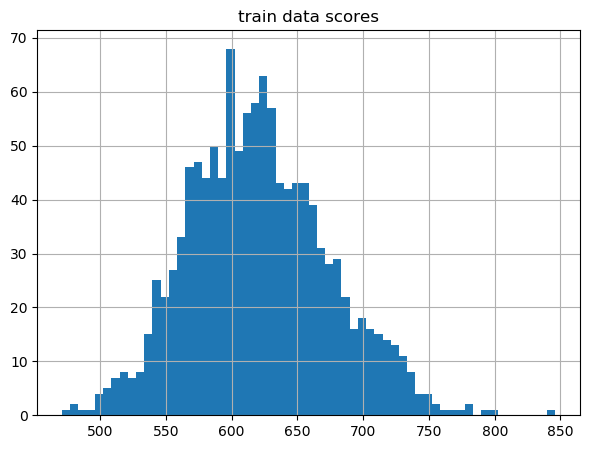

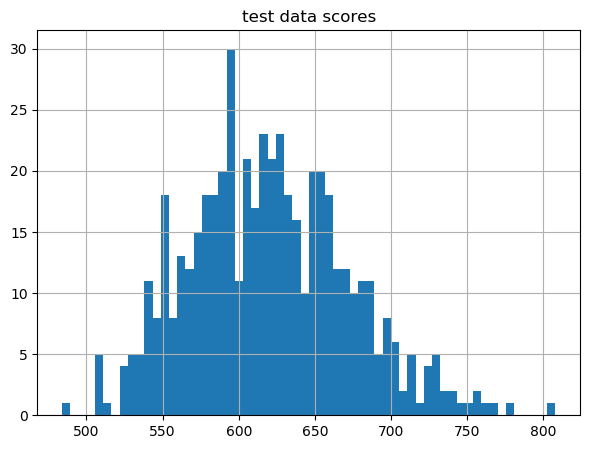

In [65]:
# sample code

# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

**Calculate Percentage Correctly Classified measures on LR model**

In [66]:
# sample code
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))



Confusion matrix:
[[474  34]
 [  1   5]]

PCC measures:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       508
           1       0.13      0.83      0.22         6

    accuracy                           0.93       514
   macro avg       0.56      0.88      0.59       514
weighted avg       0.99      0.93      0.96       514



**Evaluate the performance of logistic regression model with ROC**

Generate the ROC and calculate the AUC for the model using the scorecardpy methods. 

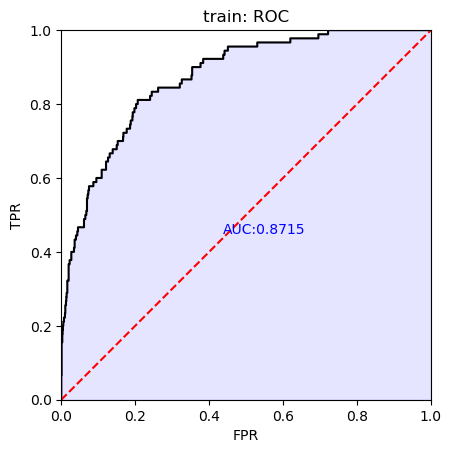

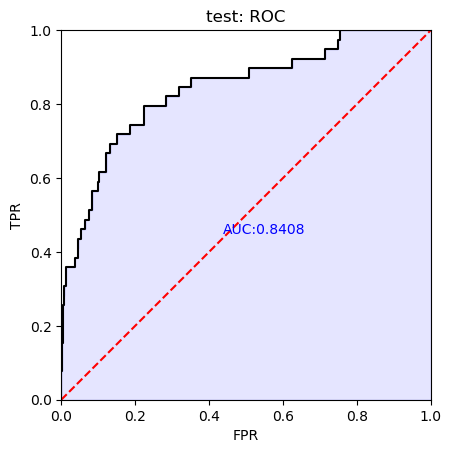

In [67]:
# sample code 

# evaluate the performance of the logistic regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type=['roc'], title = "train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type=['roc'], title = "test")

**Evaluate the performance of logistic regression model with ROC**

1. Go to where WOE and IV are calculated and find which variables have weak IV.  *Hint: check bin_iv column where <0.1*

2. Look at the scorecard and check what the difference in points bretween the range of values for those variables.  What is the largest range difference?

3. Go back to where MORTDUE was dropped and also drop the weak IV variables there, rerun the model and performance evaluation.  How did dropping those variable have a significant affect the model's performance?  


In [68]:
len(df_filtered_forsc.columns)

59

In [69]:
strongerPredictors_list = ['STATUS','APARTMENTS_AVG',
'DAYS_BIRTH',
'OWN_CAR_AGE',
'ORGANIZATION_TYPE',
'DAYS_REGISTRATION',
'EXT_SOURCE_1' ,
'DAYS_EMPLOYED'  ,
'DAYS_ID_PUBLISH'  ,
'AMT_CREDIT' ,
'EXT_SOURCE_2' , 
'EXT_SOURCE_3' ]
# 12 variables

In [70]:
filtered_df_filtered_forsc = df_filtered_forsc[strongerPredictors_list]

In [71]:
# filtered_df_filtered_forsc #1711 rows × 12 columns

In [72]:
# df_filtered_forsc.info()

# First LR Testing 12 columns

### Logistic regression with WOE encoding

Do train-test split

Use sc.woebin_ply to encode the WOE values

Generate the logistic regression model based on the encoded WOE values

In [73]:
# df_filtered_forsc.drop(columns = ['FLAG_OWN_CAR', 'OCCUPATION_TYPE'], inplace=True)

In [74]:
# sample code
# split data into 70% train and 30% test 1= bad result
train, test = sc.split_df(filtered_df_filtered_forsc, 'STATUS', ratio=0.7).values()
print(train.shape)
print(test.shape)

(1197, 12)
(514, 12)


In [75]:
# sample code
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,STATUS,DAYS_EMPLOYED_woe,DAYS_REGISTRATION_woe,EXT_SOURCE_1_woe,AMT_CREDIT_woe,OWN_CAR_AGE_woe,EXT_SOURCE_3_woe,APARTMENTS_AVG_woe,DAYS_ID_PUBLISH_woe,EXT_SOURCE_2_woe,ORGANIZATION_TYPE_woe,DAYS_BIRTH_woe
218,0,-0.255485,0.553605,-0.764203,-1.431708,-1.095235,-0.496346,-0.130543,-0.671421,-0.706512,0.011574,0.075215
236,0,0.165110,-0.648238,-1.236972,-0.355568,-0.058317,-0.496346,-1.156929,-0.208410,-0.211780,0.476324,-0.391218
328,0,0.522501,-0.648238,-0.764203,-0.158609,-0.555589,-0.496346,0.125930,0.231447,-0.211780,0.476324,-0.391218
335,0,0.522501,0.553605,0.155257,-1.431708,-0.058317,-0.496346,-0.130543,-0.671421,-0.211780,-0.819602,0.340180
343,0,0.165110,-0.648238,-1.236972,-0.141903,0.520717,-0.496346,-0.130543,-0.316728,-0.706512,0.011574,-0.391218
...,...,...,...,...,...,...,...,...,...,...,...,...
304326,0,-0.927354,0.166776,0.155257,-0.158609,0.520717,0.841105,-0.424561,-0.208410,-0.211780,0.011574,-0.391218
305644,0,0.522501,-0.648238,0.773714,-0.158609,-0.455198,-0.496346,0.347148,-0.671421,-0.211780,0.476324,0.340180
305649,0,0.522501,0.166776,0.155257,-0.141903,0.520717,0.841105,0.401216,0.231447,-0.706512,0.011574,-0.391218
306911,0,0.165110,0.166776,0.155257,0.284090,-0.555589,0.841105,-0.130543,-0.208410,0.436160,0.476324,-0.391218


In [76]:
# sample code
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,train_woe.columns != 'STATUS']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[0.45735351 0.51336463 0.38278677 0.96767562 1.01418719 0.57168981
  0.74485853 0.77893908 0.76244163 0.84527902 0.36072577]]
[-2.47159639]


### Generate scorecard

Use sc.scorecard to generate the scorecard

In [77]:
# sample code

# generate a card from the model and bins
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_CREDIT':        variable                   bin  points
145  AMT_CREDIT       [-inf,350000.0)    58.0
146  AMT_CREDIT   [350000.0,550000.0)    39.0
147  AMT_CREDIT   [550000.0,750000.0)    45.0
148  AMT_CREDIT   [750000.0,950000.0)    57.0
149  AMT_CREDIT  [950000.0,1200000.0)    93.0
150  AMT_CREDIT       [1200000.0,inf)    63.0,
 'APARTMENTS_AVG':           variable          bin  points
61  APARTMENTS_AVG  [-inf,0.02)    54.0
62  APARTMENTS_AVG  [0.02,0.05)    45.0
63  APARTMENTS_AVG   [0.05,0.1)    56.0
64  APARTMENTS_AVG   [0.1,0.12)    62.0
65  APARTMENTS_AVG  [0.12,0.18)    46.0
66  APARTMENTS_AVG  [0.18,0.23)    78.0
67  APARTMENTS_AVG   [0.23,inf)    50.0,
 'DAYS_BIRTH':       variable                  bin  points
34  DAYS_BIRTH      [-inf,-20000.0)    52.0
35  DAYS_BIRTH  [-20000.0,-14500.0)    57.0
36  DAYS_BIRTH  [-14500.0,-13000.0)    50.0
37  DAYS_BIRTH  [-13000.0,-12500.0)    66.0
38  DAYS_BIRTH  [-12500.0,-12000.0)    55.0
39  DAYS_BIRTH       [-12000.0,inf)    49.0

In [78]:
# card['bin points']

### Test scorecard

Use sc.scorecard_ply to score a new application with values
- LOAN = 88900
- VALUE = 57264
- REASON = DebtCon
- JOB = Other
- YOJ = 16.0
- DEROG = 0.0
- DELINQ = 0.0
- CLAGE = 221.8
- NINQ = 0.0
- CLNO = 16.0
- DEBTINC = 36.1

In [79]:
# # sample code

# # calulate credit score for new application
# col = ['LOAN','VALUE','REASON','JOB','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
# val = [[88900,57264,'DebtCon','Other',16.0,0.0,0.0,221.8,0.0,16.0,36.1]]
# new_appl = pd.DataFrame(val, columns=col)

# new_appl_score = sc.scorecard_ply(new_appl, card, only_total_score=False).transpose()
# new_appl_score.index = new_appl_score.index.str.replace('_points', '')

# summary =  pd.concat([new_appl.transpose(), new_appl_score], axis=1)
# summary.columns = ['App Value','Points']
# print(summary)



### Score all the test and train data

Use sc.scorecard_ply to score all the test and train data and examine the distribution of the scores

Text(0.5, 1.0, 'test data scores')

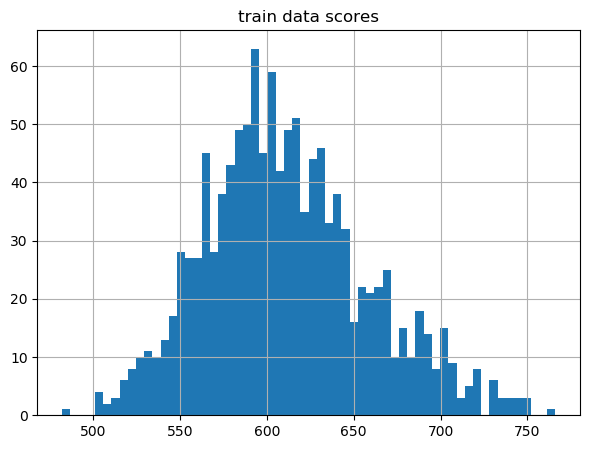

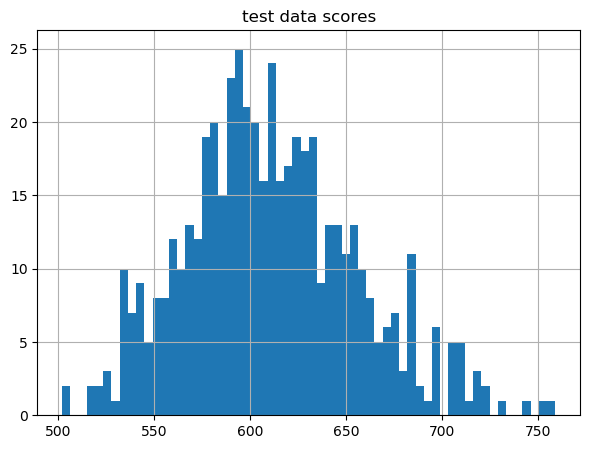

In [80]:
# sample code

# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

**Calculate Percentage Correctly Classified measures on LR model**

In [81]:
# sample code
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))



Confusion matrix:
[[474  38]
 [  1   1]]

PCC measures:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       512
           1       0.03      0.50      0.05         2

    accuracy                           0.92       514
   macro avg       0.51      0.71      0.50       514
weighted avg       0.99      0.92      0.96       514



**Evaluate the performance of logistic regression model with ROC**

Generate the ROC and calculate the AUC for the model using the scorecardpy methods. 

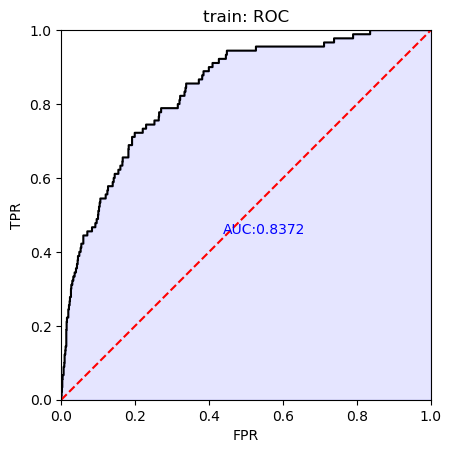

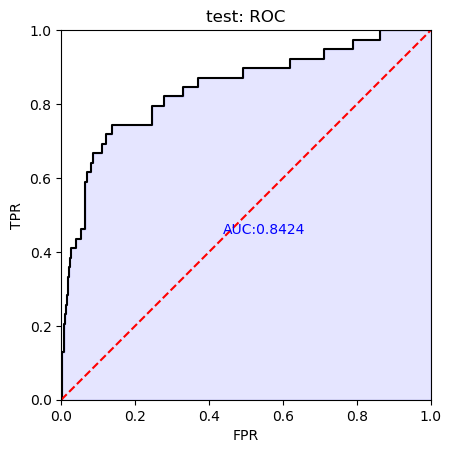

In [82]:
# sample code 

# evaluate the performance of the logistic regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type=['roc'], title = "train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type=['roc'], title = "test")

**Evaluate the performance of logistic regression model with ROC**

1. Go to where WOE and IV are calculated and find which variables have weak IV.  *Hint: check bin_iv column where <0.1*

2. Look at the scorecard and check what the difference in points bretween the range of values for those variables.  What is the largest range difference?

3. Go back to where MORTDUE was dropped and also drop the weak IV variables there, rerun the model and performance evaluation.  How did dropping those variable have a significant affect the model's performance?  


In [83]:
len(filtered_df_filtered_forsc.columns)

12